<a href="https://colab.research.google.com/github/Rogerio-mack/IMT_CD_2024/blob/main/IMT_Lab_Clustering_TimeSeries2_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://github.com/Rogerio-mack/IMT_CD_2024/blob/main/maua_logo.png?raw=true" width=300, align="right">
<br>

## **Lab: Clustering + Time Series ARIMA Models**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix

path = 'https://github.com/Rogerio-mack/IMT_CD_2024/raw/refs/heads/main/data/'

# Clustering

Considere o seguinte conjunto de dados de imóveis.

In [ ]:
df = pd.read_csv('https://github.com/INRIA/scikit-learn-mooc/raw/refs/heads/main/datasets/ames_housing_no_missing.csv')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,...,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,...,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,...,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


# Pré-Exercício. Pré-Processamento.

Para Clusterização, vamos considerar somente os atributos numéricos. Crie então um novo conjunto de dados somente com os atributos numéricos e normalizados (`StandardScaler()`).



In [ ]:
numerical_features = df.select_dtypes(include=np.number)

# Padronizar os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_features)

In [ ]:
#@markdown sanity check, must be `True`
scaled_data.sum().sum() == 6.917133532624575e-11

True

# Exercício 1. HCluster, silhueta.

Empregue o método da silhueta para definir o melhor número de clusters hierárquicos, de 2 a 10 clusters.


## **Q1. Qual o melhor número de clusters (HCluster) encontrado e o respectivo valor médio de silhueta?**

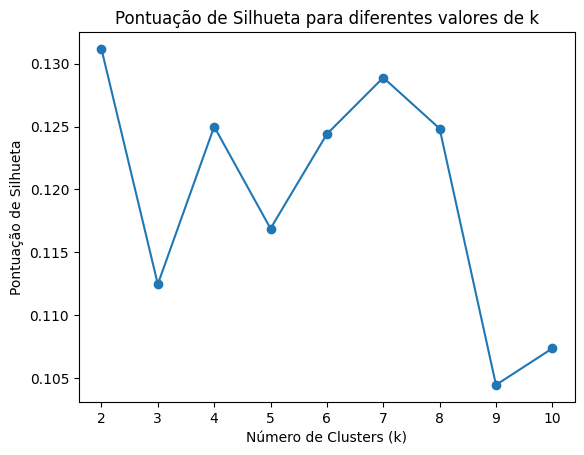

O melhor número de clusters (k) com base na silhueta é: 2, com score de 0.131


In [ ]:
# Calcular a pontuação de silhueta para diferentes valores de k

silhouette_scores = []
for k in range(2, 11):  # Começar com 2 clusters
    Agglomerative = AgglomerativeClustering(n_clusters=k)
    Agglomerative.fit(scaled_data)
    labels = Agglomerative.labels_
    silhouette_avg = silhouette_score(scaled_data, labels)
    silhouette_scores.append(silhouette_avg)

# Plotar a pontuação de silhueta para diferentes valores de k
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Pontuação de Silhueta para diferentes valores de k')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Pontuação de Silhueta')
plt.show()

# Encontrar o melhor valor de k com base na pontuação de silhueta máxima
best_k = np.argmax(silhouette_scores) + 2  # Adicionar 2 para obter o valor de k correto
print(f"O melhor número de clusters (k) com base na silhueta é: {best_k}, com score de {silhouette_scores[np.argmax(silhouette_scores)]:.3f}")

In [ ]:
silhouette_scores

[0.1311708067449362,
 0.11246662409625549,
 0.12499597241176204,
 0.11689094083071806,
 0.1244037878407914,
 0.12888914887486144,
 0.12483786946109965,
 0.10446004067266122,
 0.10736486053574434]

# Exercício 2. Hcluster

Faça a clusterização Hierárquica com o melhor número de cluster encontrado no exercício anterior. Empregue a métrica e o linkage padrão.

## **Q2. (HCluster) Qual a quantidade de elementos em cada cluster?**

## **Q3. (HCluster) Qual média de preço (`LotArea`) de cada agrupamento?**

## **Q4. (HCluster) A que clusters foram assinalados os imóveis de índices 2,15,19,12,220?**

In [ ]:
k = 2

# Criar e treinar o modelo Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=k)
agg_clustering.fit(scaled_data)

# Atribuir os rótulos de cluster aos dados
df['cluster_agg'] = agg_clustering.labels_

In [ ]:
df.groupby('cluster_agg')['LotArea'].agg(['mean', 'count'])

,mean,count
cluster_agg,,
0,12763.706271,606
1,8922.439110,854


In [ ]:
df.iloc[[2,15,19,12,220]]['cluster_agg']

,cluster_agg
2,0
15,1
19,1
12,1
220,0


# Exercício 2b. Kmeans, Elbow **(Resolvido)**

## **Q*. O método do cotovelo, confirma o mesmo melhor número de clusters que pelo critério de silhueta?**

In [ ]:
%%script echo skipping
# Calcular a inércia para diferentes valores de k
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico de cotovelo
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.show()

skipping


# Exercício 3. Kmeans

Faça a clusterização Kmeans empregando o mesmo número de clusters obtidos antes com o Kmeans. Empregue no KMeans, `random_state=1`.

In [ ]:
# Definir o número de clusters (k)
k = 2

# Criar e treinar o modelo KMeans
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(scaled_data)

# Atribuir os rótulos de cluster aos dados
df['cluster'] = kmeans.labels_



In [ ]:
df.groupby('cluster')['LotArea'].agg(['mean', 'count'])

,mean,count
cluster,,
0,12400.796160,677
1,8887.905492,783


## **Q5. (Kmeans) Qual média de preço (`LotArea`) de cada agrupamento?**

In [ ]:
# Definir o número de clusters (k)
k = 2

# Criar e treinar o modelo KMeans
kmeans = KMeans(n_clusters=k, random_state=1)
kmeans.fit(scaled_data)

# Atribuir os rótulos de cluster aos dados
df['cluster'] = kmeans.labels_



In [ ]:
df.groupby('cluster')['LotArea'].agg(['mean', 'count'])

,mean,count
cluster,,
0,12400.796160,677
1,8887.905492,783


## **Q6. Qual o percentual de "coincidência" dos grupos assinalados para os imóveis entre os métodos Kmeans e HCluster (isto é, que imóveis foram agrupados no mesmo cluster nos dois métodos)?**

**Dica:** você pode querer empregar uma matriz de confusão.

Note, que os agrupamentos poderiam ter rótulos diferentes no Kmeans e no HCluster. Por exemplo, supondo que os clusters separam imóveis "caros" e "baratos", o Kmeans poderia ter colocado os imóveis "caros" em 1, e os "baratos" em 0, enquanto o HCluster poderia ter colocado os imóveis "caros" em 0, e os "baratos" em 1. Neste caso, você deveria considerar os rótulos trocados, considerando como a mesmo agrupamento imóveis Kmeans(0) e HCluster(1), ambos de imóveis baratos.

[[566  40]
 [111 743]]


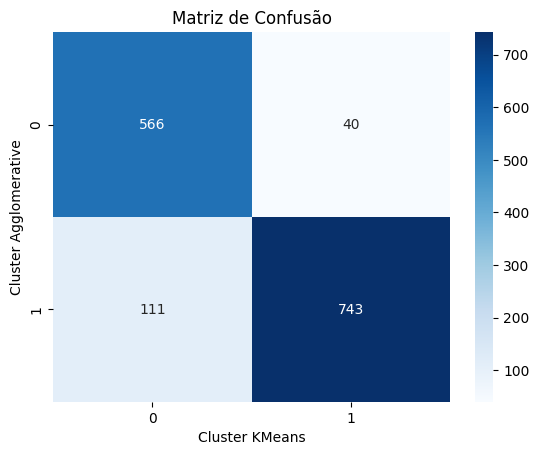

A coincidência entre os grupos é de: 0.897


In [ ]:
df['cluster'] = kmeans.labels_

# Calcular a matriz de confusão
cm = confusion_matrix(df['cluster_agg'], df['cluster'])

# Imprimir a matriz de confusão
print(cm)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Cluster KMeans')
plt.ylabel('Cluster Agglomerative')
plt.title('Matriz de Confusão')
plt.show()

print(f"A coincidência entre os grupos é de: {np.trace(cm)/np.sum(cm):.3f}")


# Exercício 4. Série Temporal, Parâmetros `p,d,q`

Analise e série sintética abaixo e determine os melhores valores `p,d,q` de um modelo ARIMA para esta série.

## **Q7. Quais os valores de p,d,q obtidos?**

## create a sintetic serie

In [ ]:
%%script echo skipping
s = np.array([1,2,3])

np.random.seed(42)

for i in range(3,100):
  next = 0.8*s[i-1] - 0.1*s[i-3] + 0.1*np.mean(s[i-2:i]) + np.random.normal(0,1) + 1
  s = np.concatenate((s, [next]))

df = pd.DataFrame()
df.index = pd.date_range(start='25/02/1996', periods = len(s), freq='ME')
df['values'] = s
df.head()

# Plota a série temporal sintética
plt.plot(df)
plt.title('Série Sintética')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.show()



skipping


In [ ]:
%%script echo skipping
df.reset_index(inplace=True)
df.rename(columns={'index':'Date'}, inplace=True)
df.to_csv('ts2.csv', index=False)
df.head()


skipping


In [ ]:
df = pd.read_csv(path + 'ts2.csv')
df.head()

,Date,values
0,1996-02-29,1.000000
1,1996-03-31,2.000000
2,1996-04-30,3.000000
3,1996-05-31,4.046714
4,1996-06-30,4.251443


### Pré-processamento da série

In [ ]:
df.index = pd.to_datetime(df['Date'])
df.drop('Date', axis=1, inplace=True)
df.head()

,values
Date,
1996-02-29,1.000000
1996-03-31,2.000000
1996-04-30,3.000000
1996-05-31,4.046714
1996-06-30,4.251443


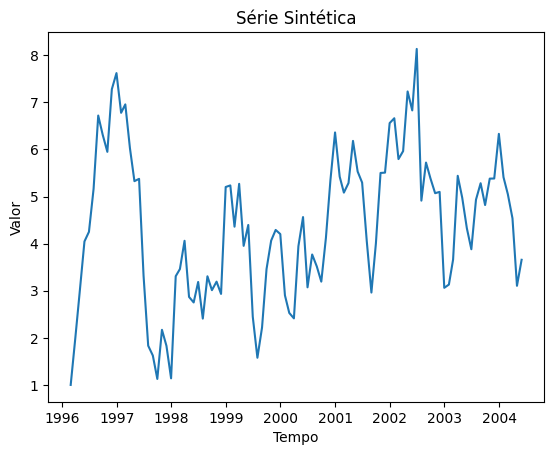

In [ ]:
plt.plot(df)
plt.title('Série Sintética')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.show()


### Teste de estacionariedade, `d`

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Realiza o teste de Dickey-Fuller aumentado
result = adfuller(df)

# Imprime os resultados do teste
print('Estatística ADF:', result[0])
print('Valor p:', result[1])
print('Valores críticos:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

# Interpreta os resultados
if result[1] <= 0.05:
    print('A série temporal é estacionária.')
else:
    print('A série temporal não é estacionária.')

Estatística ADF: -3.60212591991641
Valor p: 0.005720514550195752
Valores críticos:
	1%: -3.498198082189098
	5%: -2.891208211860468
	10%: -2.5825959973472097
A série temporal é estacionária.


### Parâmetros `p,q`

* ACF $\longrightarrow$ `q`
* PACF $\longrightarrow$ `p`

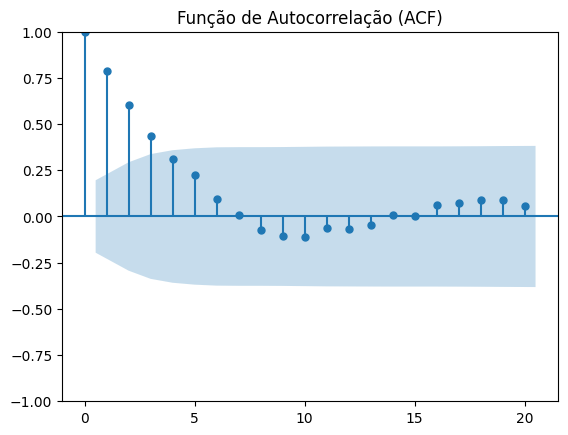

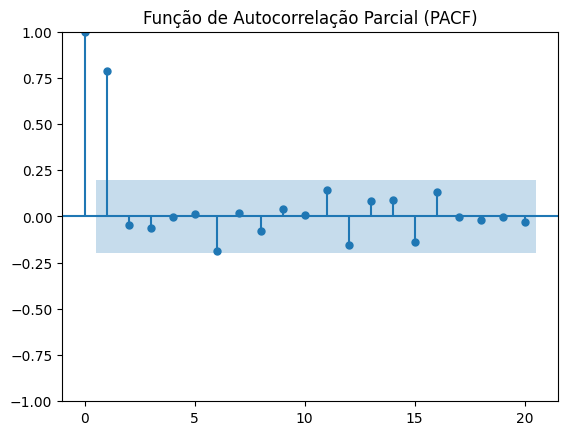

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calcula e plota a função de autocorrelação (ACF)
plot_acf(df, lags=20)
plt.title('Função de Autocorrelação (ACF)')
plt.show()

# Calcula e plota a função de autocorrelação parcial (PACF)
plot_pacf(df, lags=20)
plt.title('Função de Autocorrelação Parcial (PACF)')
plt.show()

# Exercício 5. Série Temporal, ARIMA(`p,d,q`)

Faça o modelo ARIMA(`p,d,q`) com base nos melhores valores encontrados.

## **Q8. Qual o AIC e MSE obtidos com o modelo ARIMA(`p,d,q`)?**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


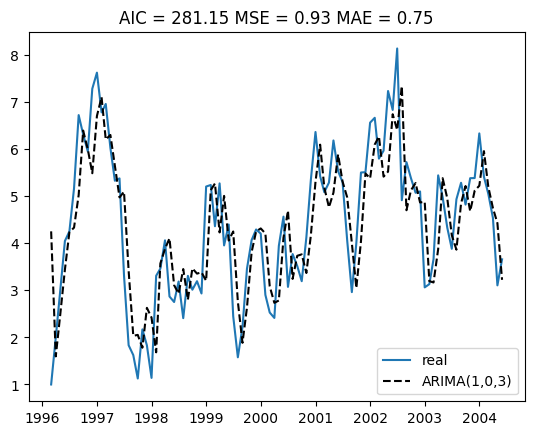

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

p = 1; d = 0; q = 3
model = ARIMA(df, order=(p, d, q))
results = model.fit(method_kwargs={'maxiter':700})

plt.plot(df,label='real' )

plt.plot(results.fittedvalues, 'k--', label='ARIMA(' + str(p) + ',' + str(d) + ',' + str(q) + ')')
plt.title(f'AIC = {results.aic:.2f} MSE = {results.mse:.2f} MAE = {results.mae:.2f}')

plt.legend()
plt.show()

In [ ]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                  100
Model:                 ARIMA(1, 0, 3)   Log Likelihood                -134.573
Date:                Thu, 07 Nov 2024   AIC                            281.146
Time:                        15:19:43   BIC                            296.777
Sample:                    02-29-1996   HQIC                           287.472
                         - 05-31-2004                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2516      0.409     10.395      0.000       3.450       5.053
ar.L1          0.7435      0.144      5.166      0.000       0.461       1.026
ma.L1          0.1135      0.199      0.572      0.5

## **Q9. Qual a predição para o mês de Setembro de 2004?**

In [ ]:
results.forecast(4)

,predicted_mean
2004-06-30,3.683684
2004-07-31,3.897585
2004-08-31,3.985141
2004-09-30,4.053502


## **Q9b. Qual o erro MAPE obtido para previsão dos 3 últimos meses presentes na série com base nos valores anteriores?** (RESOLVIDO)

Neste exercício você verifica a capacidade de generalização do modelo para novos casos, o que não é possível para previsão de dados "futuros" que não são conhecidos.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


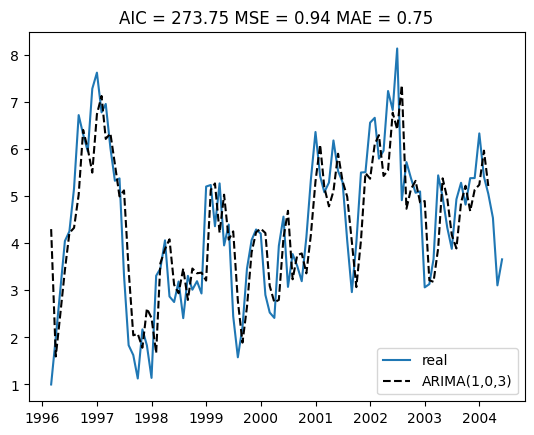

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

p = 1; d = 0; q = 3
model = ARIMA(df[0:-3], order=(p, d, q))
results = model.fit(method_kwargs={'maxiter':700})

plt.plot(df,label='real' )

plt.plot(results.fittedvalues, 'k--', label='ARIMA(' + str(p) + ',' + str(d) + ',' + str(q) + ')')
plt.title(f'AIC = {results.aic:.2f} MSE = {results.mse:.2f} MAE = {results.mae:.2f}')

plt.legend()
plt.show()

In [ ]:
results.forecast(3)

,predicted_mean
2004-03-31,4.762935
2004-04-30,4.646314
2004-05-31,4.567551


In [ ]:
df.tail(3)

,values
Date,
2004-03-31,4.537624
2004-04-30,3.104870
2004-05-31,3.657160


In [ ]:
# Calculate MAPE
def MAPE(y_true, y_pred):
  return np.mean(np.abs((y_true - y_pred) / y_true))

y_true = df.tail(3)['values'].values
y_pred = results.forecast(3)

print(f"MAPE: {MAPE(y_true, y_pred):.2f}")

MAPE: 0.27
